<a href="https://www.kaggle.com/code/thiennguyen15/nlcs-stanford-dog?scriptVersionId=147548170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!nvidia-smi

Sun Oct 22 07:40:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 96.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 47.6MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 13.6ms
Speed: 3.1ms pre-process, 13.6ms inference, 33.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/kaggle/working


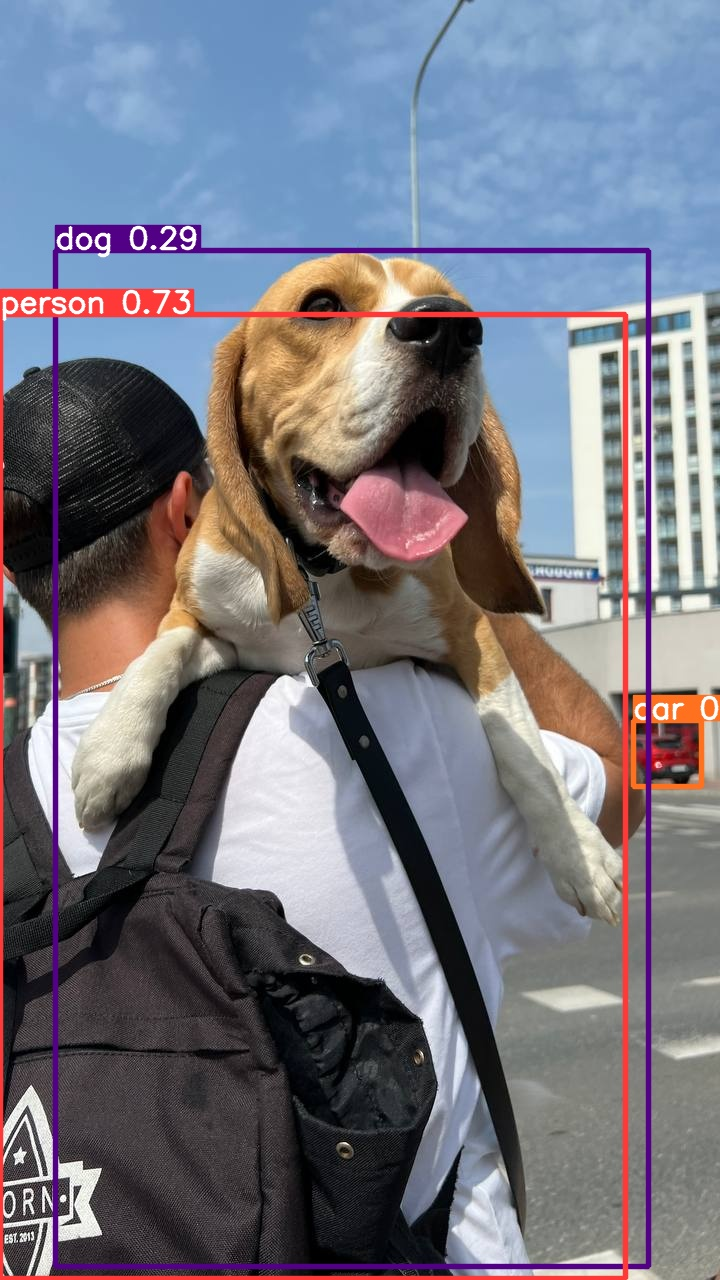

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=224)

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="7IDZJCAQZ6SyWJQWe3eT")
project = rf.workspace("igor-romanica-gmail-com").project("stanford-dogs-0pff9")
dataset = project.version(3).download("yolov8")

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
easyocr 1.6.2 requires opencv-python-headless<=4.5.4.60, but you have opencv-python-headless 4.8.0.74 which is incompatible.
cloud-tpu-client 0.10 requires google-api-python-client==1.8.0, but you have google-api-python-client 2.79.0 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Stanford-dogs-3 in yolov8:: 100%|██████████| 46458/46458 [00:06<00:00, 7016.46it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=224 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 192MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/Stanford-dogs-3/data.yaml, epochs=20, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None

In [10]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch12670.jpg
PR_curve.png					   train_batch12671.jpg
P_curve.png					   train_batch12672.jpg
R_curve.png					   train_batch2.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1697960515.6ce1f227a98d.130.0  val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


/kaggle/working


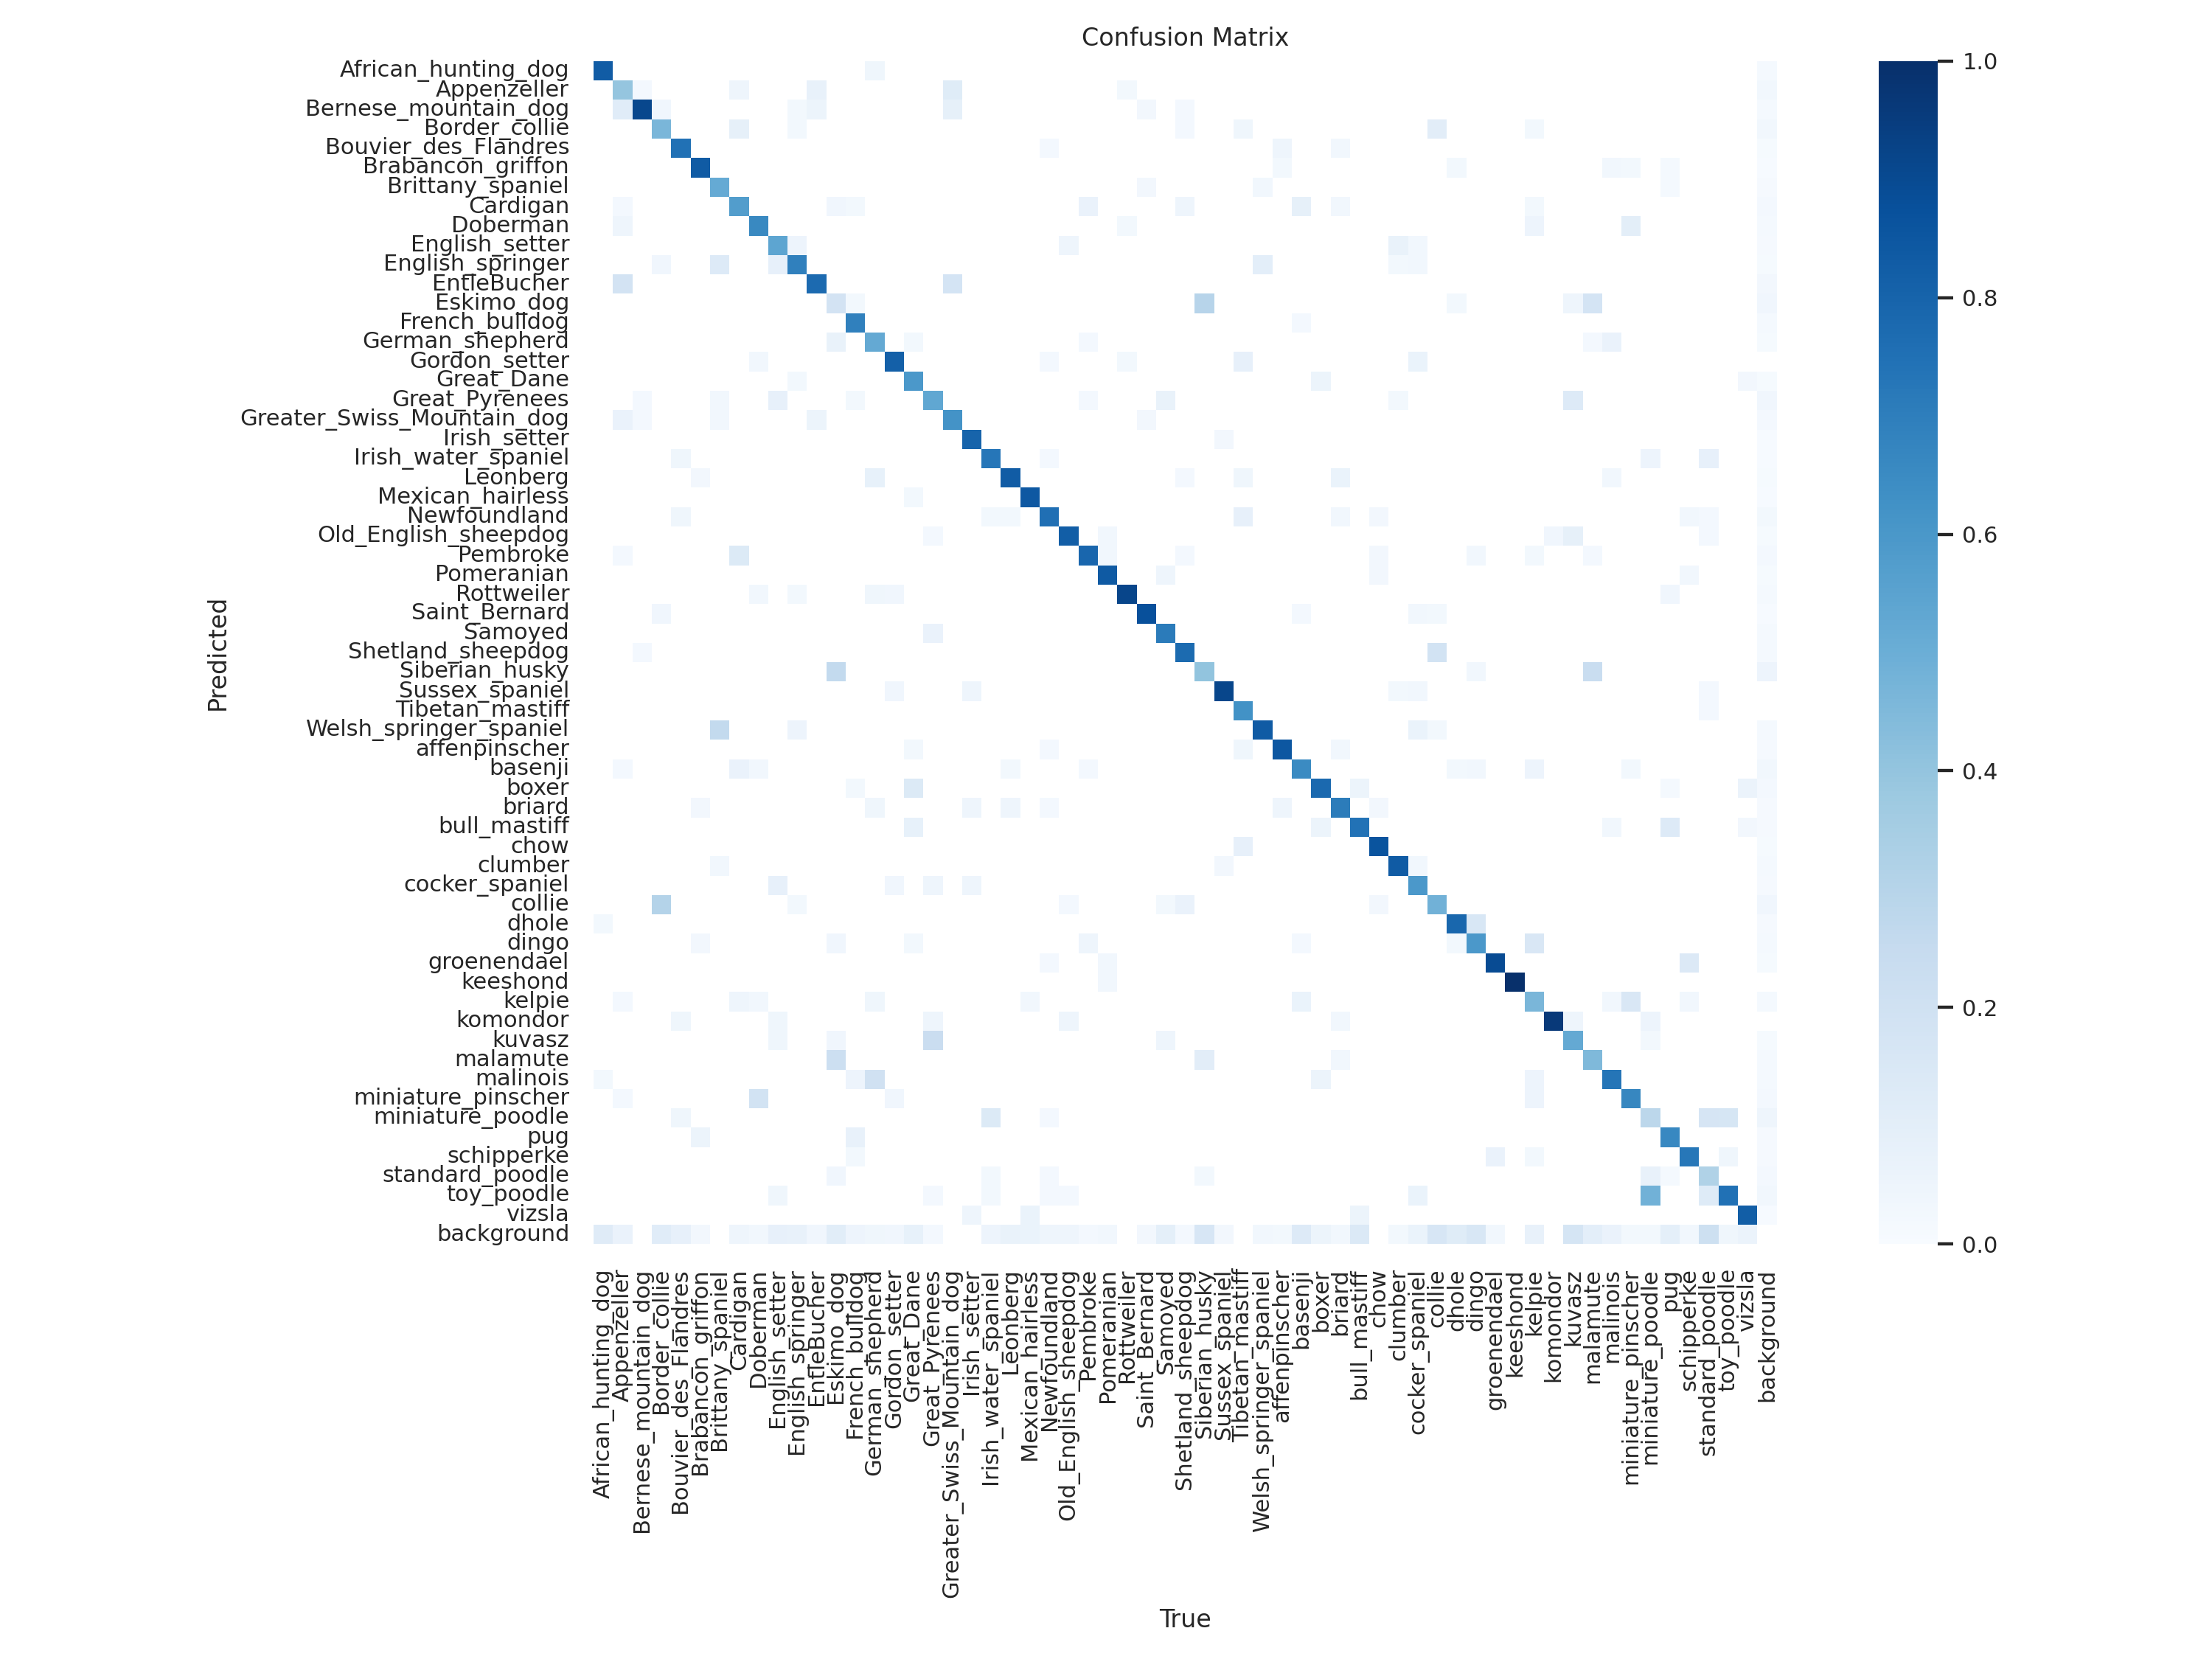

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


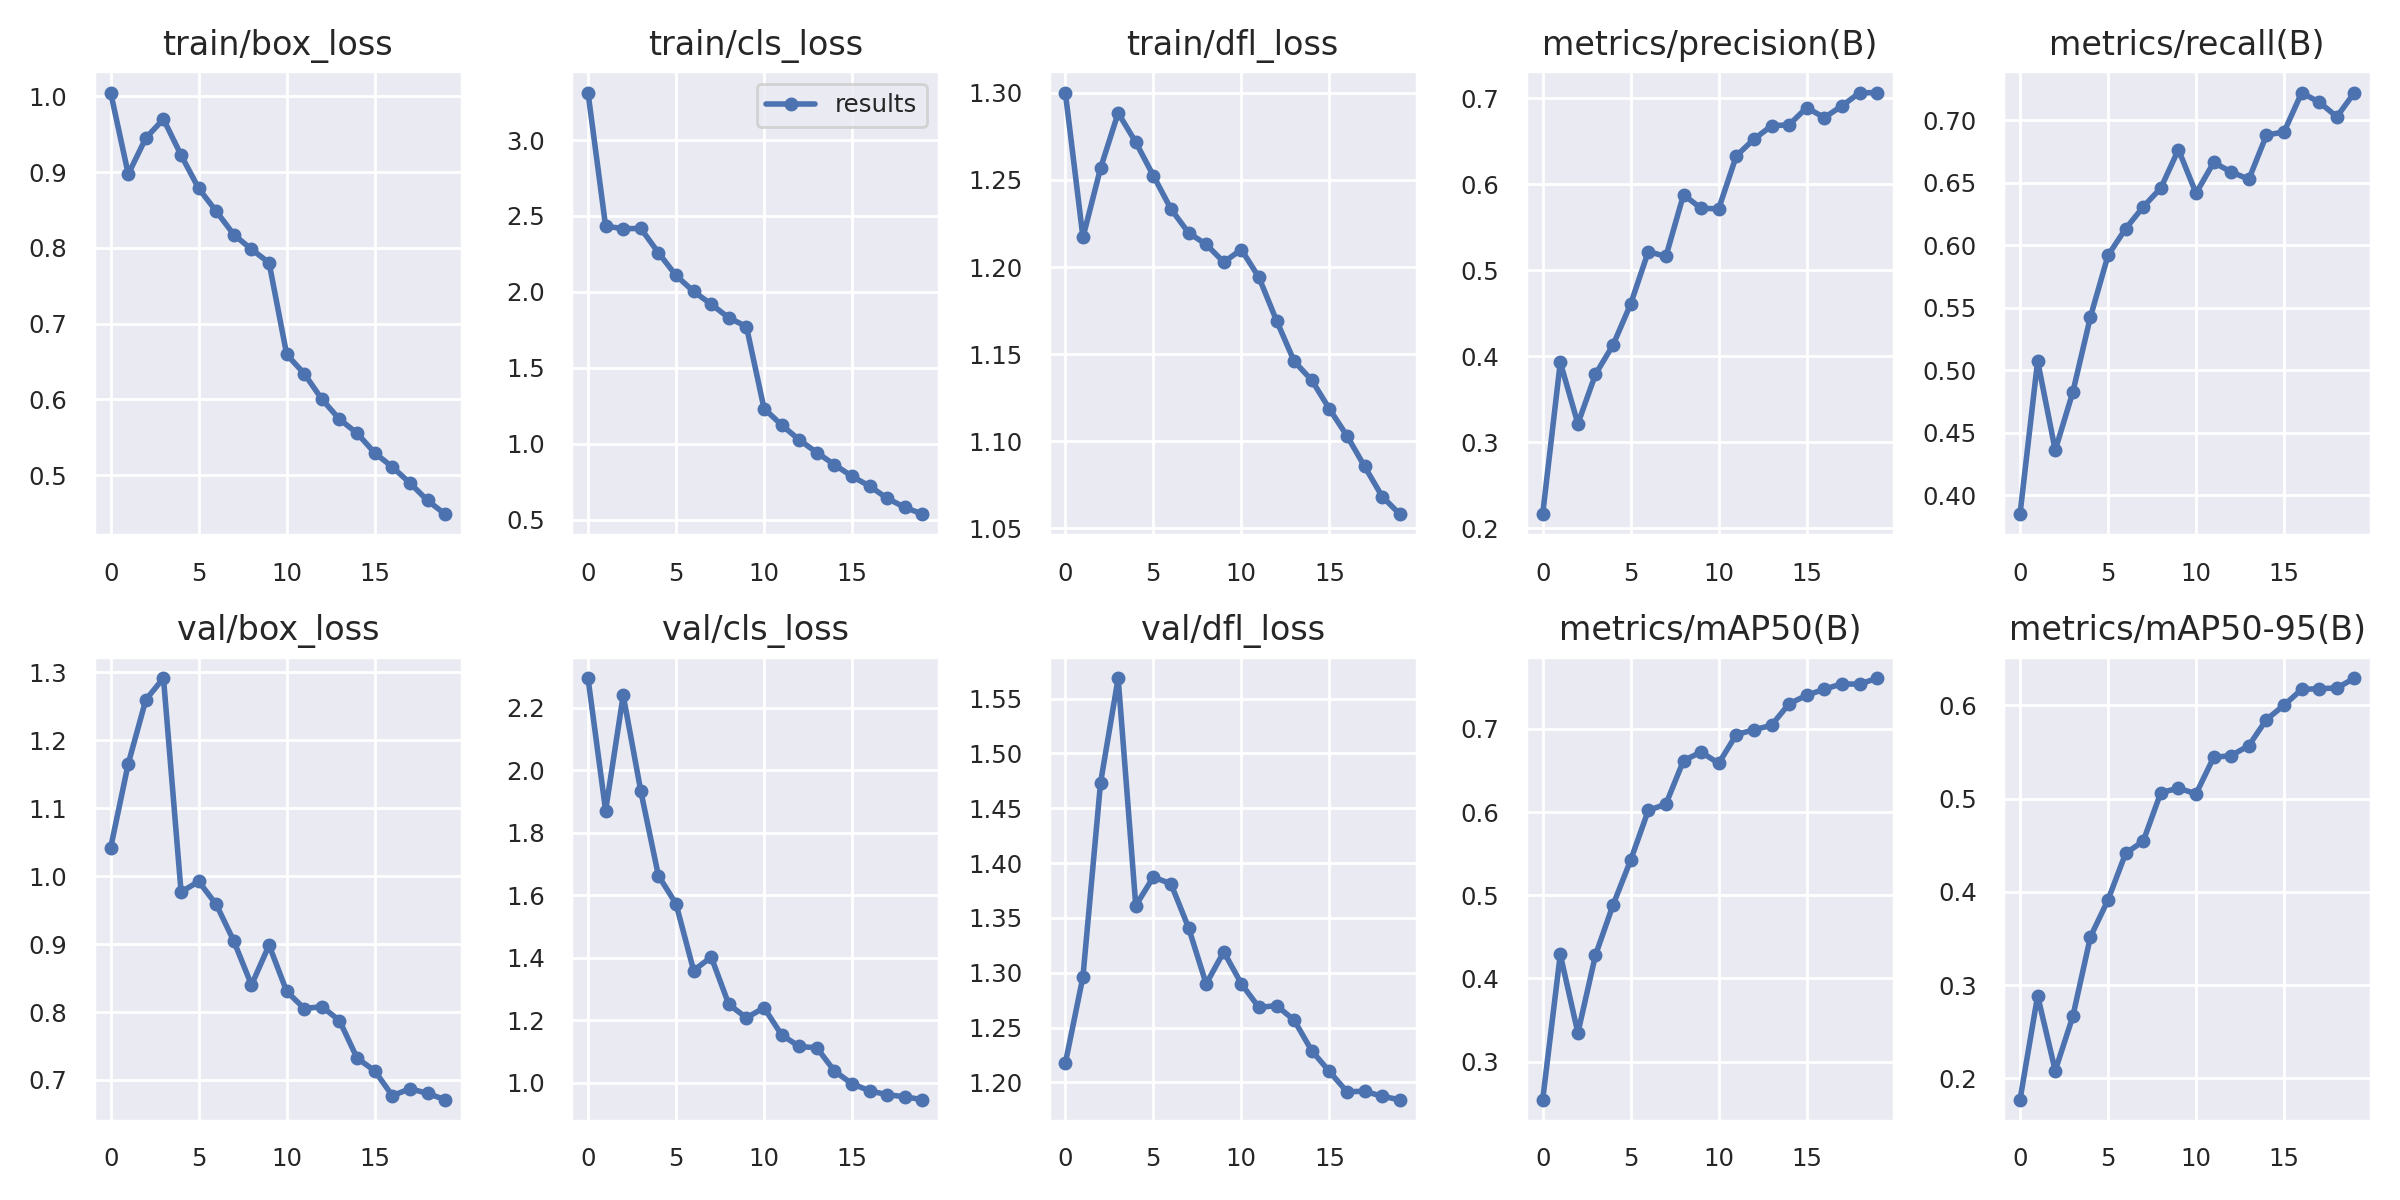

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


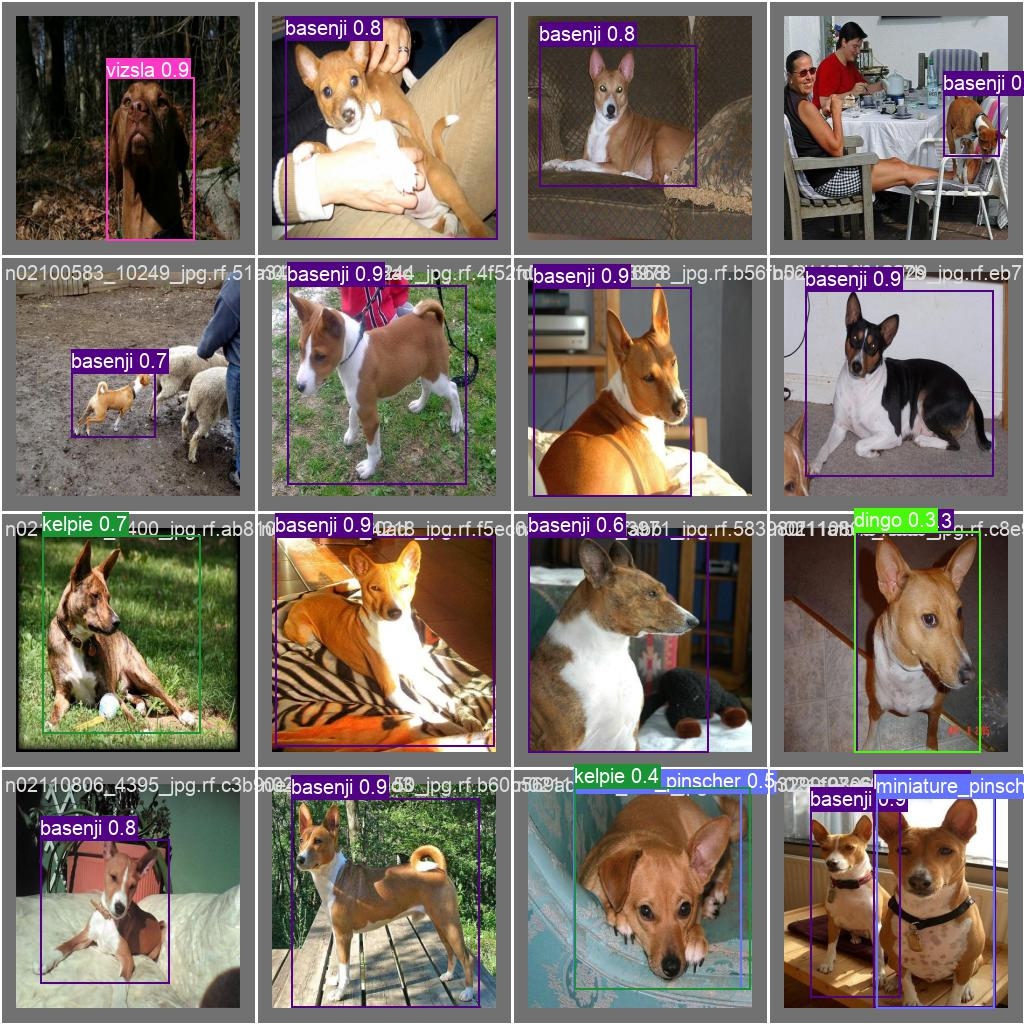

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.20 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11148804 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /kaggle/working/datasets/Stanford-dogs-3/valid/labels.cache... 197
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1975       2131      0.708      0.722      0.761      0.628
   African_hunting_dog       1975         41      0.875      0.854      0.916       0.75
           Appenzeller       1975         43      0.507      0.395      0.473      0.352
  Bernese_mountain_dog       1975         46       0.72      0.935      0.849      0.683
         Border_collie       1975         26       0.49      0.692      0.518      0.428
  Bouvier_des_Flandres       1975         24      0.774      0.708      0.843      0.712
     Brabancon_griffon       1975         36      0.782      0.833       0.88      0.787
      Brittany_spaniel   

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.20 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 11148804 parameters, 0 gradients, 28.6 GFLOPs
image 1/988 /kaggle/working/datasets/Stanford-dogs-3/test/images/n02100583_11450_jpg.rf.4ccae58abee40b53e04e63f9524050d2.jpg: 224x224 1 vizsla, 7.5ms
image 2/988 /kaggle/working/datasets/Stanford-dogs-3/test/images/n02100583_11701_jpg.rf.ecc415bbf921a00ab139807fe4f15494.jpg: 224x224 1 vizsla, 7.8ms
image 3/988 /kaggle/working/datasets/Stanford-dogs-3/test/images/n02100583_11752_jpg.rf.8068297f5f742bcdfec8811fcff9a5c6.jpg: 224x224 1 vizsla, 8.4ms
image 4/988 /kaggle/working/datasets/Stanford-dogs-3/test/images/n02100583_12047_jpg.rf.5f86a5e0722bbf34b0ca1a94c1e7865c.jpg: 224x224 2 vizslas, 9.2ms
image 5/988 /kaggle/working/datasets/Stanford-dogs-3/test/images/n02100583_12097_jpg.rf.e023abdb8612079f5e650e2edb82b3d7.jpg: 224x224 1 vizsla, 8.5ms
image 6/988 /kaggle/working/datasets/Stanford-dogs-3/test/i

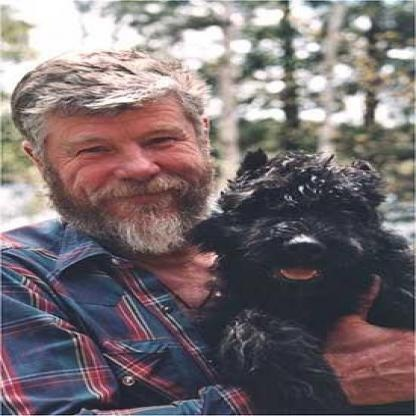

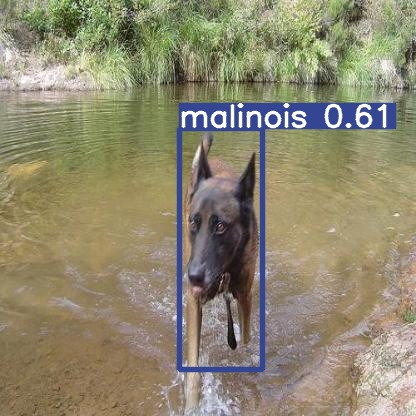

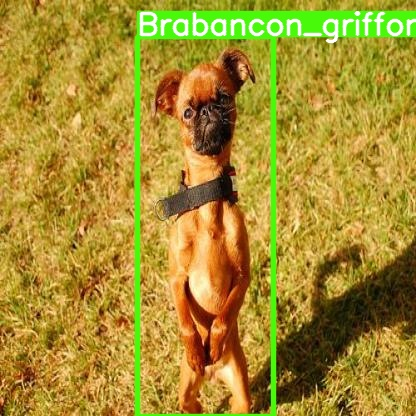

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")